In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

img_size = (180, 180)
batch_size = 32
data_dir = r"C:\Users\86183\Desktop\final\uva-machine-learning-25f-projects\team-30\data\cleaned\mushroom_binary"
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 5460 files belonging to 2 classes.
Using 4368 files for training.
Found 5460 files belonging to 2 classes.
Using 1092 files for validation.


In [4]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [5]:
model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)



Epoch 1/15


137/137 [==============================] - 35s 241ms/step - loss: 0.6600 - accuracy: 0.6417 - val_loss: 0.5968 - val_accuracy: 0.6822
Epoch 2/15
137/137 [==============================] - 33s 238ms/step - loss: 0.6266 - accuracy: 0.6479 - val_loss: 0.5874 - val_accuracy: 0.6841
Epoch 3/15
137/137 [==============================] - 33s 240ms/step - loss: 0.6170 - accuracy: 0.6488 - val_loss: 0.6062 - val_accuracy: 0.6859
Epoch 4/15
137/137 [==============================] - 33s 238ms/step - loss: 0.6129 - accuracy: 0.6506 - val_loss: 0.5910 - val_accuracy: 0.6859
Epoch 5/15
137/137 [==============================] - 33s 240ms/step - loss: 0.6023 - accuracy: 0.6568 - val_loss: 0.5746 - val_accuracy: 0.6877
Epoch 6/15
137/137 [==============================] - 33s 239ms/step - loss: 0.5950 - accuracy: 0.6639 - val_loss: 0.5848 - val_accuracy: 0.6951
Epoch 7/15
137/137 [==============================] - 33s 239ms/step - loss: 0.5940 - accuracy: 0.6605 - val_loss: 0.5762 - val_

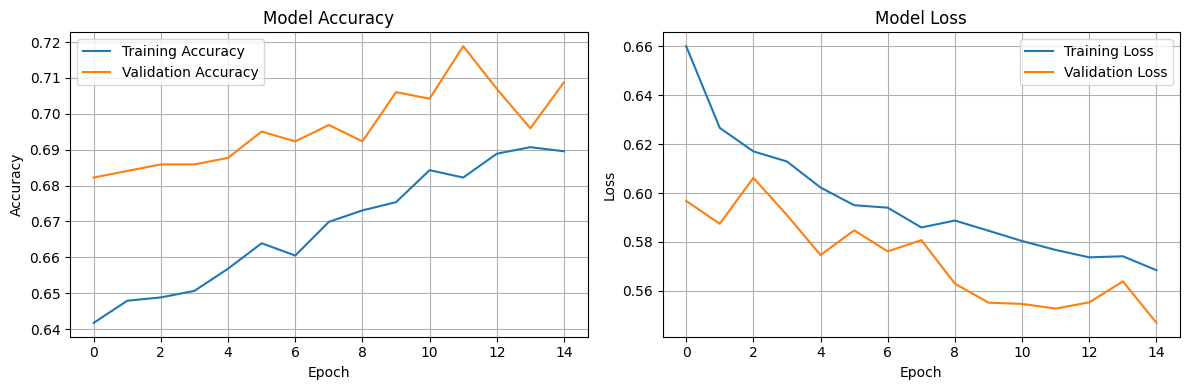

35/35 [==============================] - 2s 51ms/step - loss: 0.5469 - accuracy: 0.7088

Final validation accuracy: 0.7088
Final validation loss: 0.5469


In [6]:
# Train the model
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# View model structure after training
print("\nModel structure after training:")
model.summary()

# Save the model
model.save('mushroom_classifier.keras') #save model
print("\nModel saved as 'mushroom_classifier.keras'")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"\nFinal validation accuracy: {val_accuracy:.4f}")
print(f"Final validation loss: {val_loss:.4f}")

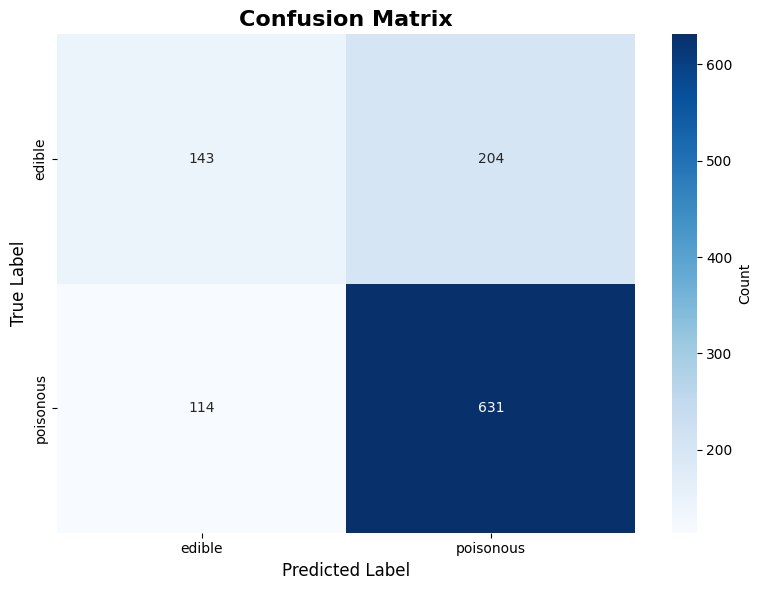


Classification Report:
              precision    recall  f1-score   support

      edible       0.56      0.41      0.47       347
   poisonous       0.76      0.85      0.80       745

    accuracy                           0.71      1092
   macro avg       0.66      0.63      0.64      1092
weighted avg       0.69      0.71      0.70      1092


Detailed Metrics:
True Negatives (TN):  143
False Positives (FP): 204
False Negatives (FN): 114
True Positives (TP):  631

Overall Accuracy:  0.7088
Precision:         0.7557
Recall:            0.8470
F1-Score:          0.7987

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IMPORTANT: For mushroom classification,
False Negatives (poisonous classified as edible)
are MORE DANGEROUS than False Positives!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on validation set
y_pred = []
y_true = []

# Iterate through validation dataset
for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    # Convert sigmoid output to binary predictions (threshold = 0.5)
    pred_labels = (predictions > 0.5).astype(int).flatten()

    y_pred.extend(pred_labels)
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Get class names
class_names = train_ds.class_names  # ['edible', 'poisonous']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print("=" * 50)
print(classification_report(y_true, y_pred, target_names=class_names))

# Calculate and display additional metrics
tn, fp, fn, tp = cm.ravel()

print("\nDetailed Metrics:")
print("=" * 50)
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nOverall Accuracy:  {accuracy:.4f}")
print(f"Precision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"F1-Score:          {f1:.4f}")

# Important note for mushroom classification
print("\n" + "!" * 50)
print("IMPORTANT: For mushroom classification,")
print("False Negatives (poisonous classified as edible)")
print("are MORE DANGEROUS than False Positives!")
print("!" * 50)

Found 1366 files belonging to 2 classes.
Basic Test Set Evaluation
43/43 [==============================] - 2s 54ms/step - loss: 0.5752 - accuracy: 0.6889

Test accuracy: 0.6889
Test loss:     0.5752


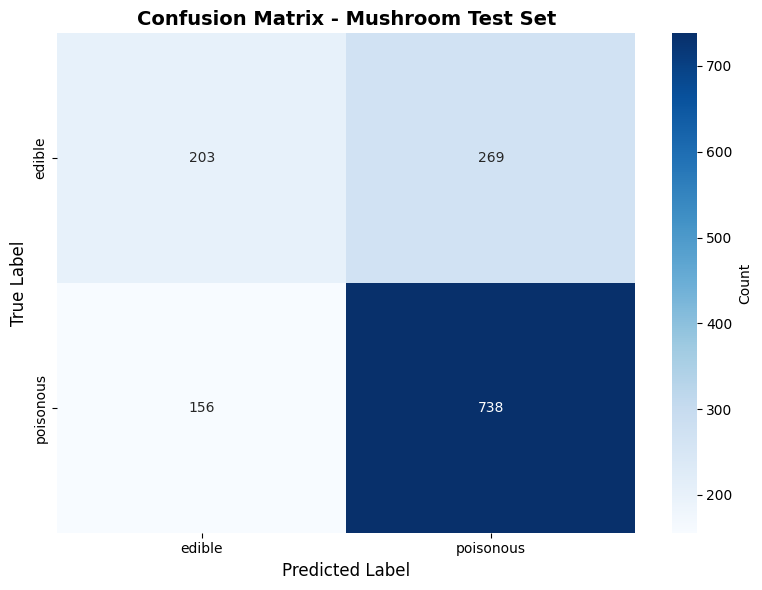


Test Set Classification Report
              precision    recall  f1-score   support

      edible     0.5655    0.4301    0.4886       472
   poisonous     0.7329    0.8255    0.7764       894

    accuracy                         0.6889      1366
   macro avg     0.6492    0.6278    0.6325      1366
weighted avg     0.6750    0.6889    0.6770      1366


Test Set - Safety-Focused Metrics
True Negatives (Edible → Edible):  203
False Positives (Edible → Poisonous): 269
False Negatives (Poisonous → Edible): 156  <-- DANGEROUS!
True Positives (Poisonous → Poisonous):  738

Key Metrics:
Overall Accuracy:          0.6889
Precision (Poisonous):     0.7329
Recall (Poisonous):        0.8255  <-- CRITICAL SAFETY METRIC
F1-Score (Poisonous):      0.7764
False Negative Rate (FNR): 0.1745 (17.45%)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
SAFETY WARNING: False Negatives = Poisonous mushrooms mislabeled as edible!
Test Set False Negatives: 156 samples | FNR: 17.45%
!!!!!!!!!!!

In [11]:
# ========================
# Basic Configuration
# ========================
img_size = (180, 180) 
batch_size = 32
test_dir = r"C:\Users\86183\Desktop\final\uva-machine-learning-25f-projects\team-30\data\cleaned\mushroom_testing"

# ========================
# Step 1: Load Test Set (Fix for class_names AttributeError)
# ========================

test_ds_original = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False  
)

# Extract class names (edible/poisonous) - FIX for AttributeError
class_names = test_ds_original.class_names


test_ds = test_ds_original.apply(tf.data.experimental.ignore_errors())

# ========================
# Step 2: Basic Test Evaluation (Your Original Code)
# ========================
print("="*60)
print("Basic Test Set Evaluation")
print("="*60)
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss:     {test_loss:.4f}")

# ========================
# Step 3: Generate Predictions for Metrics
# ========================
# Initialize lists to store true/predicted labels
y_true = []
y_pred = []

# Iterate through test set to collect predictions
for images, labels in test_ds:
    # Get model predictions (sigmoid output for binary classification)
    predictions = model.predict(images, verbose=0)
    
    # Convert to binary labels (threshold = 0.5)
    pred_labels = (predictions > 0.5).astype(int).flatten()
    
    # Collect true labels (flatten for binary classification)
    true_labels = labels.numpy().flatten()
    
    # Append to lists
    y_true.extend(true_labels)
    y_pred.extend(pred_labels)

# Convert to numpy arrays for metric calculations
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ========================
# Step 4: Confusion Matrix (Test Set)
# ========================
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix (publication-quality)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,        # Show numerical counts
    fmt='d',           # Format as integers
    cmap='Blues',      # Color scheme
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={'label': 'Count'}  # Color bar label
)
plt.title('Confusion Matrix - Mushroom Test Set', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# ========================
# Step 5: Classification Report (Recall/Precision/F1-Score)
# ========================
print("\n" + "="*60)
print("Test Set Classification Report")
print("="*60)
report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4  # 4 decimal places for precision
)
print(report)

# ========================
# Step 6: Detailed Safety-Focused Metrics
# ========================
# Extract TN/FP/FN/TP from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate core metrics (critical for mushroom safety)
accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Poisonous precision
recall = tp / (tp + fn) if (tp + fn) > 0 else 0     # Poisonous recall (SAFETY CRITICAL)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # FNR (dangerous errors)

# Print detailed metrics
print("\n" + "="*60)
print("Test Set - Safety-Focused Metrics")
print("="*60)
print(f"True Negatives (Edible → Edible):  {tn}")
print(f"False Positives (Edible → Poisonous): {fp}")
print(f"False Negatives (Poisonous → Edible): {fn}  <-- DANGEROUS!")
print(f"True Positives (Poisonous → Poisonous):  {tp}")

print("\nKey Metrics:")
print(f"Overall Accuracy:          {accuracy:.4f}")
print(f"Precision (Poisonous):     {precision:.4f}")
print(f"Recall (Poisonous):        {recall:.4f}  <-- CRITICAL SAFETY METRIC")
print(f"F1-Score (Poisonous):      {f1_score:.4f}")
print(f"False Negative Rate (FNR): {false_negative_rate:.4f} ({false_negative_rate*100:.2f}%)")

# Critical safety warning
print("\n" + "!"*60)
print("SAFETY WARNING: False Negatives = Poisonous mushrooms mislabeled as edible!")
print(f"Test Set False Negatives: {fn} samples | FNR: {false_negative_rate*100:.2f}%")
print("!"*60)



